# Fashion MNIST

There is a nice alternative to the MNIST dataset, the Fashion MNIST dataset. It includes items like shirts, dresses, and shoes as will be shown below.

## Loading Fashion MNIST

Go ahead and load the fashion dataset by running the following cell. Note that "np" is given in the labels indicating that the default keras types are numpy arrays.

In [ ]:
# 1. Run the following cell to load the data.
from tensorflow.keras.datasets import fashion_mnist
((X_train_np, y_train_np), (X_test_np, y_test_np)) = fashion_mnist.load_data()

## Reshape Data

To get the data into the same shape as our first MNIST notebook, we need to reshape the data. First check the shape, the reshape it.

In [ ]:
# 2. Check shape of X_train_np
X_train_np.shape

(60000, 28, 28)

In [ ]:
# 3. Reshape X_train_np from 3D to 2D using the method .reshape(60000, 28*28) on X_train_np
X_train_np = X_train_np.reshape(60000, 28*28)

In [ ]:
# 4. Convert to a pandas DataFrame X_train using pd.DataFrame with X_train_np as input
import pandas as pd

X_train = pd.DataFrame(X_train_np)

In [ ]:
# 5. Limit X_train to the first 2000 rows (hint you may use .iloc[:2000] on X_train)
X_train = X_train.iloc[:2000]

In [ ]:
# 6. Show the first 5 rows of the DataFrame X_train
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


## Graph and Label Fashion Data

In [ ]:
# 7. Convert y_train to dataFrame and check y_train.value_counts()
y_train = pd.DataFrame(y_train_np)
y_train = y_train.iloc[:2000]
y_train.value_counts()

1    216
7    215
2    202
9    200
5    200
8    198
3    195
6    194
0    194
4    186
dtype: int64

In [ ]:
# 8. We need the class names of the y values. Run the this cell to load them.
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


In [ ]:
# 9. Write code to generate a random integer of y, and print the class name and y value  
# Hint y_train_np may be helpful.
import numpy as np
randomIndex = np.random.randint(0, y_train.shape[0])
randomrow = y_train.iloc[randomIndex, :]
print(randomIndex)
print(randomrow)
print(class_names[randomrow[0]])

1535
0    1
Name: 1535, dtype: uint8
trouser


In [ ]:
X.shape

(2000, 783)

In [ ]:
X = X_train.iloc[:, 1:]

X.shape[1]**.5

27.982137159266443

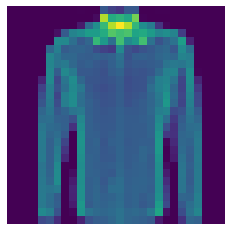

shirt


In [ ]:
# 10. Graph a random image and Fashion MNIST classification.
type(randomrow)

randomrow.shape

randomrow

randomIndex = np.random.randint(0, X_train.shape[0])
randomrow = y_train.iloc[randomIndex, :]
# Get the row of the random index
randomPixels = X_train.iloc[randomIndex, :]


npRandomRow = np.array(randomPixels)

randomImage = npRandomRow.reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(randomImage)
plt.axis("off")
plt.show()

print(class_names[randomrow[0]])

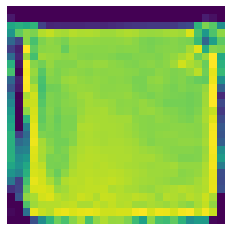

bag


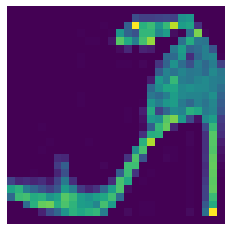

sandal


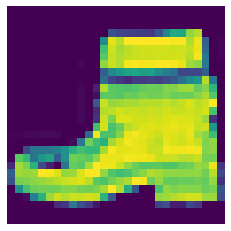

ankle_boot


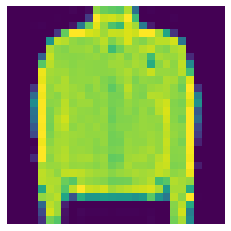

coat


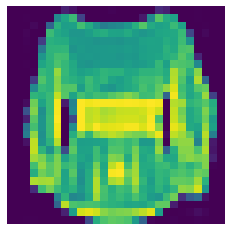

shirt


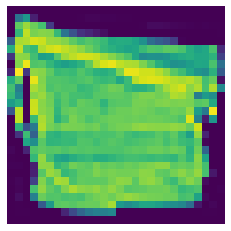

bag


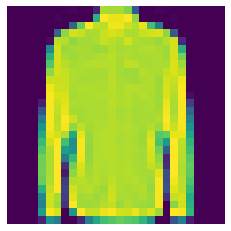

shirt


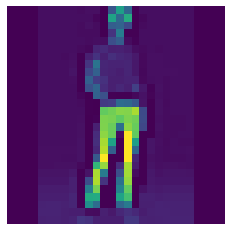

trouser


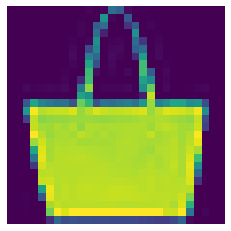

bag


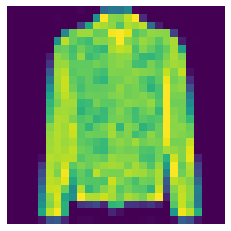

coat


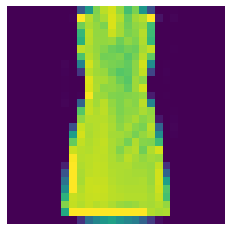

dress


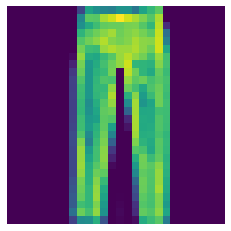

trouser


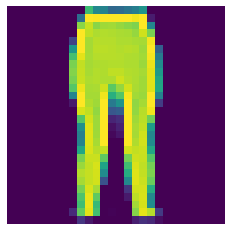

trouser


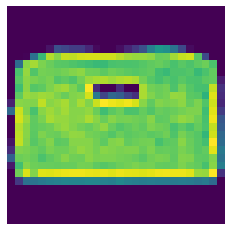

bag


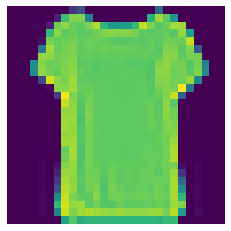

shirt


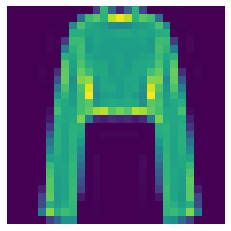

pullover


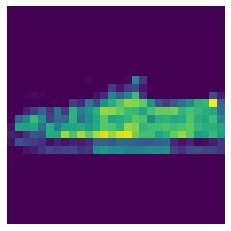

sneaker


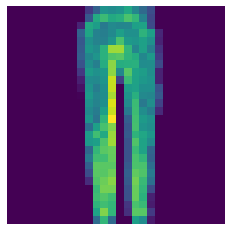

trouser


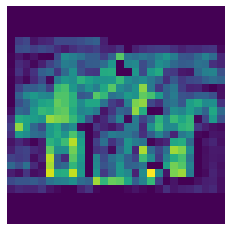

bag


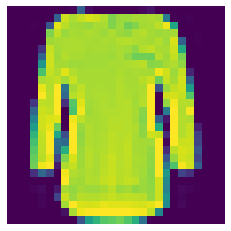

tshirt/top


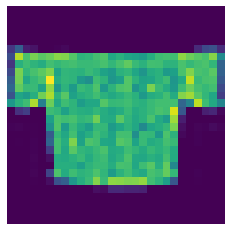

tshirt/top


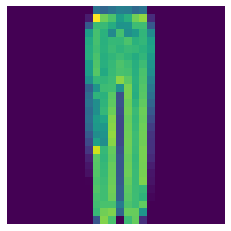

trouser


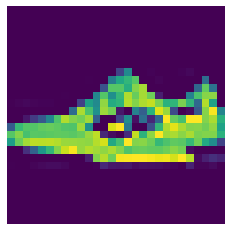

sneaker


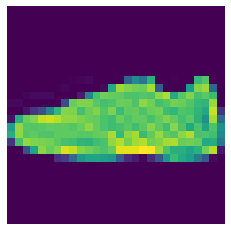

sneaker


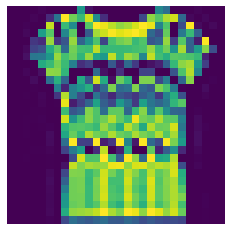

shirt


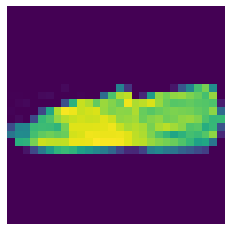

sandal


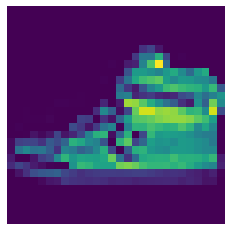

sneaker


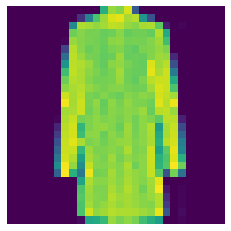

shirt


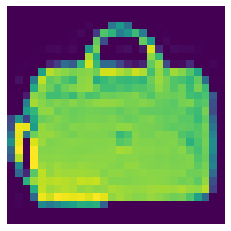

bag


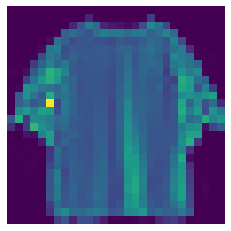

shirt


In [ ]:
# 11. Research options to graph multiple images and their classifications at once. 
def im_print():
  randomIndex = np.random.randint(0, X_train.shape[0])
  randomrow = y_train.iloc[randomIndex, :]
# Get the row of the random index
  randomPixels = X_train.iloc[randomIndex, :]


  npRandomRow = np.array(randomPixels)

  randomImage = npRandomRow.reshape(28, 28)

  plt.imshow(randomImage)
  plt.axis("off")
  plt.show()

  print(class_names[randomrow[0]])

for i in range(30):
  im_print()
# Share with your cohort.

## Machine Learning

Score machine learning models with the Fashion MNIST Data using the strategies learned in lecture.

In [ ]:
y_test = pd.DataFrame(y_test_np)
X_test_np = X_test_np.reshape(10000, 28*28)
X_test = pd.DataFrame(X_test_np)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
def classifier(model):
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  testScore = model.score(X_test, y_test)
  print(f"Training:{train_score}")
  print(f"Test:{testScore}")

In [ ]:
classifier(RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Training Score:1.0
Test Score:0.8171


In [ ]:
classifier(LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score:0.992
Test Score:0.768


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
classifier(XGBClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [ ]:
classifier(KNeighborsClassifier())